# Start and stop cut detection

## Start and stop cuts in the audio
It is a common practice to leave small regions of silence at the beginning and end of the music tracks.
One of the reasons is that, for example, some CD players are rather slow starting the playback.
In this case, this simple technique helps reducing glitches or artefacts.

In this context, we define a start or stop cut as not having enough starting or end silence, where the amount of silence that is considered enough may vary depending on the application or target device.
While detecting this phenomenon is trivial from an engineering point of view, in this notebook, we will demonstrate how to do it in a few lines with Essentia algorithms.


In [2]:
from IPython.display import Audio
from essentia.standard import MonoLoader, StartStopCut
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 9)

In [3]:
def compute(x, frame_size=1024, hop_size=512, **kwargs):
    start_cut, stop_cut = StartStopCut(
        frameSize=frame_size,
        hopSize=hop_size,
        **kwargs
    )(x)

    start_color = "r" if start_cut else "g"
    stop_color = "r" if stop_cut else "g"

    return start_color, stop_color

# Detecting start and stop cuts
[StartStopCuts](https://essentia.upf.edu/reference/std_StartStopCut.html) works by comparing the position of the first and last non-silent frames to the actual beginning and ending of the audio stream.
The algorithm features parametrizable starting and ending time thresholds (`maximumStartTime` and `maximumStopTime`) that can be configured according to the user's needs.
The input stream is considered to contain a starting (ending) cut if the first (last) non-silent frame occurs before (after) `maximumStartTime` (`maximumStopTime`).

*Notes:*

*This algorithm is designed to operate on the entire (file) audio.*
*In the streaming mode, use it in combination with RealAccumulator.*

*The encoding/decoding process of lossy formats can introduce some padding at the beginning/end of the file. E.g., an MP3 file encoded and decoded with [LAME](http://lame.sourceforge.net/tech-FAQ.txt) using the default parameters will introduce a delay of 1104 samples.*
*In this case, the maximumStartTime can be increased by 1104 ÷ 44100 × 1000 = 25 ms to prevent misdetections.*

Finally, let's see a couple of examples. In the following plots, a green line is drawn when the margin is healthy and a red one when there is a cut:


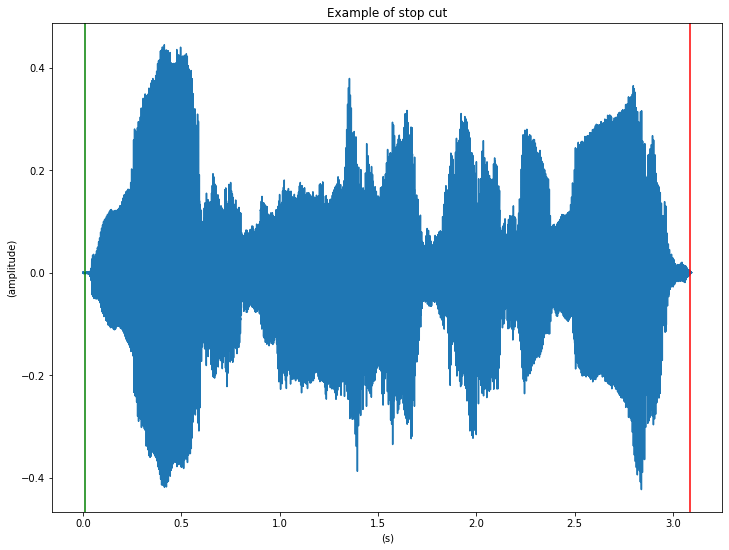

In [4]:
sr = 44100

audio_file = "../../../test/audio/recorded/vignesh.wav"
audio = MonoLoader(filename=audio_file)()

duration = len(audio) / sr
time = np.arange(len(audio)) / sr
plt.plot(time, audio)
plt.title("Example of stop cut")
plt.xlabel("(s)")
plt.ylabel("(amplitude)")

start_color, stop_color = compute(audio, threshold=-48)

plt.axvline(0.01, color=start_color)
plt.axvline(duration - 0.01, color=stop_color)

In [5]:
Audio(audio, rate=sr)

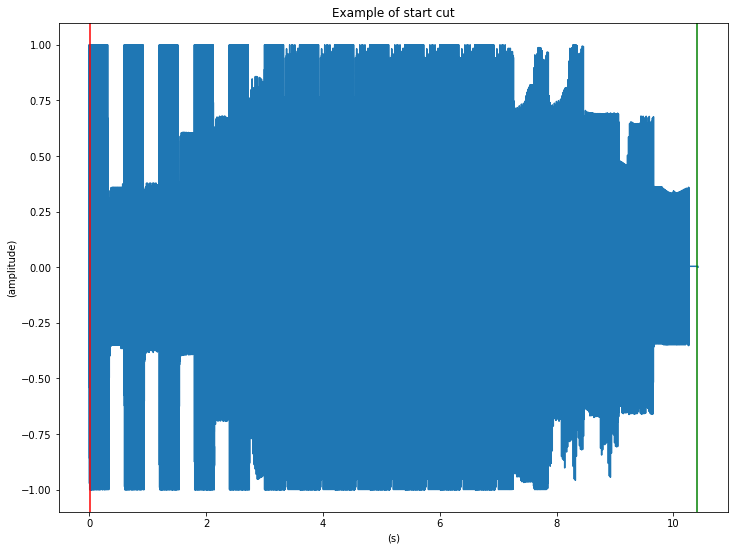

In [6]:
audio_file = "../../../test/audio/recorded/distorted.wav"
audio = MonoLoader(filename=audio_file)()

duration = len(audio) / sr
time = np.arange(len(audio)) / sr
plt.plot(time, audio)
plt.title("Example of start cut")
plt.xlabel("(s)")
plt.ylabel("(amplitude)")

start_color, stop_color = compute(audio, threshold=-48)

plt.axvline(0.01, color=start_color)
plt.axvline(duration - 0.01, color=stop_color)

In [7]:
Audio(audio, rate=sr)